In [2]:
import numpy as np

c = np.array([[1, 0, 0, 0, 0, 0, 0]]) #입력
W = np.random.randn(7, 3)          #가중치
h = np.matmul(c, W) #중간 노드

#완전연결층의 계산은 행렬곱으로 수행가능
print(h)

[[ 1.34698558 -1.1265471  -0.89624295]]


In [3]:
from common.layers import MatMul

layer = MatMul(W)
h = layer.forward(c)
print(h)

[[ 1.34698558 -1.1265471  -0.89624295]]


In [12]:
import sys
sys.path.append('..')
from common.util import preprocess, create_contexts_target, convert_one_hot

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)

print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [14]:
contexts, target = create_contexts_target(corpus, window_size = 1)

print(contexts)

print(target)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
[1 2 3 4 1 5]


In [15]:
vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

In [30]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss

class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')
        
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 340 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 341 |  반복 1 / 2 | 시간 0[s] | 손실 0.93
| 에폭 342 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 343 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 344 |  반복 1 / 2 | 시간 0[s] | 손실 0.89
| 에폭 345 |  반복 1 / 2 | 시간 0[s] | 손실 0.99
| 에폭 346 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 347 |  반복 1 / 2 | 시간 0[s] | 손실 0.77
| 에폭 348 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 349 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 350 |  반복 1 / 2 | 시간 0[s] | 손실 0.97
| 에폭 351 |  반복 1 / 2 | 시간 0[s] | 손실 0.98
| 에폭 352 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 353 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 354 |  반복 1 / 2 | 시간 0[s] | 손실 0.98
| 에폭 355 |  반복 1 / 2 | 시간 0[s] | 손실 0.89
| 에폭 356 |  반복 1 / 2 | 시간 0[s] | 손실 0.89
| 에폭 357 |  반복 1 / 2 | 시간 0[s] | 손실 1.01
| 에폭 358 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 359 |  반복 1 / 2 | 시간 0[s] | 손실 1.00
| 에폭 360 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 361 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 362 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 363 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 364 |  반복 1

| 에폭 713 |  반복 1 / 2 | 시간 0[s] | 손실 0.50
| 에폭 714 |  반복 1 / 2 | 시간 0[s] | 손실 0.78
| 에폭 715 |  반복 1 / 2 | 시간 0[s] | 손실 0.50
| 에폭 716 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 717 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 718 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 719 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 720 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 721 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 722 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 723 |  반복 1 / 2 | 시간 0[s] | 손실 0.70
| 에폭 724 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 725 |  반복 1 / 2 | 시간 0[s] | 손실 0.77
| 에폭 726 |  반복 1 / 2 | 시간 0[s] | 손실 0.49
| 에폭 727 |  반복 1 / 2 | 시간 0[s] | 손실 0.69
| 에폭 728 |  반복 1 / 2 | 시간 0[s] | 손실 0.45
| 에폭 729 |  반복 1 / 2 | 시간 0[s] | 손실 0.72
| 에폭 730 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 731 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 732 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 733 |  반복 1 / 2 | 시간 0[s] | 손실 0.77
| 에폭 734 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 735 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 736 |  반복 1 / 2 | 시간 0[s] | 손실 0.49
| 에폭 737 |  반복 1

C:\Users\qhrrl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qhrrl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qhrrl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qhrrl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qhrrl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\qhrrl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48373 missing from cur

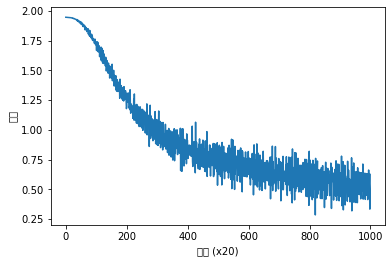

In [31]:
#학습
from common.trainer import Trainer
from common.optimizer import Adam
#from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [32]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [ 1.5795519 -1.045733   0.971704  -1.091363   0.9335088]
say [ 1.3058441  1.144802  -1.16269    0.2350791 -1.154846 ]
goodbye [ 0.2449346  -0.9505206   1.002463   -0.6887799   0.99999565]
and [ 1.4423724  0.788652  -0.7943954  1.8881016 -0.6148828]
i [ 0.2530772  -0.91516745  0.9872765  -0.69952685  0.99013585]
hello [ 1.571098   -1.0390784   0.94704384 -1.0886678   0.95444584]
. [-0.10445494  1.1674198  -1.1927235  -1.6771075  -1.2504267 ]
